In [1]:
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt

In [21]:
def f(x):
    return jnp.abs(x) + jnp.sin(x)

In [22]:
f = lambda x:jnp.abs(x) + jnp.sin(x)

In [23]:
df=grad(f)

In [26]:
df(1.)

DeviceArray(1.5403023, dtype=float32)

In [32]:
ddf=grad(df)
ddf(1.)

DeviceArray(-0.841471, dtype=float32)

In [ ]:
# 多変数

In [55]:
g = lambda x,y,z: jnp.sqrt(x**2+2*y**2+3*z**2)

In [56]:
dgdx=grad(g,argnums=0)
dgdx(1.,1.,1.)

DeviceArray(0.40824828, dtype=float32)

In [54]:
dgdy=grad(g,argnums=1)
dgdy(1.,1.,1.)

DeviceArray(0.81649655, dtype=float32)

In [57]:
dgdr=grad(g,argnums=(0,1,2))
dgdr(1.,1.,1.)

(DeviceArray(0.40824828, dtype=float32),
 DeviceArray(0.81649655, dtype=float32),
 DeviceArray(1.2247448, dtype=float32))

In [58]:
# vmap

In [63]:
xv=jnp.linspace(-10,10,100)

In [64]:
# df(xarr)

In [65]:
from jax import vmap

In [69]:
dfv=vmap(grad(f))

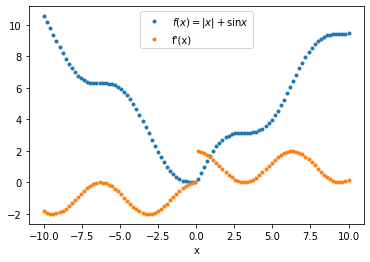

In [76]:
import matplotlib.pyplot as plt
plt.plot(xarr,f(xarr),".",label="$f(x)=|x|+\sin{x}$")
plt.plot(xarr,dfv(xarr),".",label="f'(x)")
plt.xlabel("x")
plt.legend()
plt.savefig("autograd1.pdf")

In [ ]:
＃多変数 vmap

In [77]:
gv = vmap(g, (0, None,None), 0)

In [93]:
dgdr=grad(g,argnums=(0,1,2))
dgdr(1.,1.,1.)

(DeviceArray(0.40824828, dtype=float32),
 DeviceArray(0.81649655, dtype=float32),
 DeviceArray(1.2247448, dtype=float32))

In [113]:
dgdr=grad(g,argnums=(0,1,2))
try:
    dgdr(xv,1.,1.)
except:
    print("Error")

Error


In [116]:
dgdrv=vmap(grad(g,argnums=(0,1,2)), (0, None,None), 0)
try:
    dgdrv(xv,1.,1.)
except:
    print("Error")

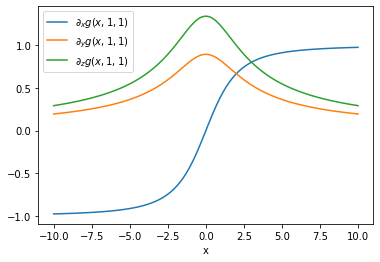

In [126]:
dd=dgdrv(xv,1.,1.)
plt.plot(xv,dd[0],label="$\partial_x g(x,1,1)$")
plt.plot(xv,dd[1],label="$\partial_y g(x,1,1)$")
plt.plot(xv,dd[2],label="$\partial_z g(x,1,1)$")
plt.xlabel("x")
plt.legend()
plt.savefig("autograd2.pdf")

In [131]:
dgdrv=vmap(grad(g,argnums=(0,1,2)), (0, None,None), 0)
